# Prevendo gastos de usuários

Para este projeto, utilizaremos os dados do arquivo [train.csv](https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv), que contém dados reais extraídos através do Google Analytics do Google Merchandising Store.

O dicionário dos dados pode ser consultado clicando [aqui](https://support.google.com/analytics/answer/3437719?hl=pt-BR).

### Carregando os dados

In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv'

dados = pd.read_csv(url)
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [2]:
# Tamanho da base de dados
dados.shape

(12283, 12)

In [3]:
# Número de usuários únicos no dataset
dados.fullVisitorId.nunique()

9996

In [4]:
# Tipos das colunas
dados.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [5]:
# Consertando o tipo das variáveis fullVisitorId e visitId

url = 'https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv'

dados = pd.read_csv(url, dtype={'fullVisitorId':'object', 'visitId':'object'})
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [6]:
# Consertando o tipo da variável date

dados['date'] = pd.to_datetime(dados['date'].apply(str))
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,2016-09-02,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,2016-09-02,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [7]:
dados.dtypes

channelGrouping                 object
date                    datetime64[ns]
device                          object
fullVisitorId                   object
geoNetwork                      object
sessionId                       object
socialEngagementType            object
totals                          object
trafficSource                   object
visitId                         object
visitNumber                      int64
visitStartTime                   int64
dtype: object

In [8]:
# Explorando as colunas que são dicionários

dados['device'][0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

Precisamos separar essa coluna em várias outras colunas para podermos utilizá-las nos nossos modelos.

In [9]:
type(dados['device'][0])

str

In [10]:
# Função para transformar em dicionário
import json

json.loads(dados['device'][0])

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [11]:
type(json.loads(dados['device'][0]))

dict

In [12]:
# Transformando as colunas dicionários em dataframes

dicionarios = ['device', 'geoNetwork', 'totals', 'trafficSource']

for coluna in dicionarios:
    dados = dados.join(pd.DataFrame([json.loads(linha) for linha in dados[coluna]]))


In [13]:
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,Organic Search,2016-09-02,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


In [14]:
dados.drop(columns=dicionarios, inplace=True)

In [15]:
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


In [16]:
# Vendo quantos valores unicos tem em cada coluna

for coluna in dados.columns:
    n_unicos = dados[coluna].nunique(dropna=False)
    print('{} {}'.format(coluna, n_unicos))

channelGrouping 8
date 366
fullVisitorId 9997
sessionId 12276
socialEngagementType 1
visitId 12272
visitNumber 50
visitStartTime 12279
browser 22
browserVersion 1
browserSize 1
operatingSystem 12
operatingSystemVersion 1
isMobile 2
mobileDeviceBranding 1
mobileDeviceModel 1
mobileInputSelector 1
mobileDeviceInfo 1
mobileDeviceMarketingName 1
flashVersion 1
language 1
screenColors 1
screenResolution 1
deviceCategory 3
continent 6
subContinent 22
country 145
region 212
metro 53
city 296
cityId 1
networkDomain 1747
latitude 1
longitude 1
networkLocation 1
visits 1
hits 96
pageviews 75
bounces 2
newVisits 2
transactionRevenue 147
campaign 7
source 76
medium 7
keyword 129


TypeError: unhashable type: 'dict'

In [18]:
# Verificando a coluna que deu erro
coluna

'adwordsClickInfo'

In [19]:
dados['adwordsClickInfo'][0]

{'criteriaParameters': 'not available in demo dataset'}

Não temos nenhuma informação nessa variável, então vamos excluí-la do dataset:

In [20]:
dados.drop(columns=['adwordsClickInfo'], inplace = True)

In [21]:
# Vendo quantos valores unicos tem em cada coluna

for coluna in dados.columns:
    n_unicos = dados[coluna].nunique(dropna=False)
    print('{} {}'.format(coluna, n_unicos))

channelGrouping 8
date 366
fullVisitorId 9997
sessionId 12276
socialEngagementType 1
visitId 12272
visitNumber 50
visitStartTime 12279
browser 22
browserVersion 1
browserSize 1
operatingSystem 12
operatingSystemVersion 1
isMobile 2
mobileDeviceBranding 1
mobileDeviceModel 1
mobileInputSelector 1
mobileDeviceInfo 1
mobileDeviceMarketingName 1
flashVersion 1
language 1
screenColors 1
screenResolution 1
deviceCategory 3
continent 6
subContinent 22
country 145
region 212
metro 53
city 296
cityId 1
networkDomain 1747
latitude 1
longitude 1
networkLocation 1
visits 1
hits 96
pageviews 75
bounces 2
newVisits 2
transactionRevenue 147
campaign 7
source 76
medium 7
keyword 129
isTrueDirect 2
referralPath 198
adContent 16
campaignCode 2


Vemos que temos muitas colunas com um único valor. Iremos revomê-las do dataset, pois não possuem nenhuma informação.

#### Removendo colunas

In [22]:
# Removendo as colunas com um único valor

colunas_para_remover = []

for coluna in dados.columns:
    n_unicos = dados[coluna].nunique(dropna=False)
    if n_unicos == 1:
        colunas_para_remover.append(coluna)

colunas_para_remover

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [23]:
dados.drop(columns = colunas_para_remover, inplace = True)
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1,NaN,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


### Feature Engineering

In [24]:
dados.dtypes

channelGrouping               object
date                  datetime64[ns]
fullVisitorId                 object
sessionId                     object
visitId                       object
visitNumber                    int64
visitStartTime                 int64
browser                       object
operatingSystem               object
isMobile                        bool
deviceCategory                object
continent                     object
subContinent                  object
country                       object
region                        object
metro                         object
city                          object
networkDomain                 object
hits                          object
pageviews                     object
bounces                       object
newVisits                     object
transactionRevenue            object
campaign                      object
source                        object
medium                        object
keyword                       object
i

In [25]:
# Transformando as variáveis quantitativas em numericas
quant = ['bounces','hits', 'newVisits', 'pageviews', 'transactionRevenue']

for coluna in quant:
    dados[coluna] = pd.to_numeric(dados[coluna])
    
dados.dtypes

channelGrouping               object
date                  datetime64[ns]
fullVisitorId                 object
sessionId                     object
visitId                       object
visitNumber                    int64
visitStartTime                 int64
browser                       object
operatingSystem               object
isMobile                        bool
deviceCategory                object
continent                     object
subContinent                  object
country                       object
region                        object
metro                         object
city                          object
networkDomain                 object
hits                           int64
pageviews                      int64
bounces                      float64
newVisits                    float64
transactionRevenue           float64
campaign                      object
source                        object
medium                        object
keyword                       object
i

In [26]:
# Tratando os NAs
dados.transactionRevenue.isnull().sum()

12119

Vemos que a variável transactionRevenue (receita da compra) tem bastante valores missing (NAs). Esses valores são referentes aos clientes que entraram no site e não gastaram nada, então substituiremos esses NAs por zero.

In [27]:
# Substituindo os NAs na coluna transactionRevenue
dados['transactionRevenue'] = dados['transactionRevenue'].fillna(0)
dados['transactionRevenue']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12278    0.0
12279    0.0
12280    0.0
12281    0.0
12282    0.0
Name: transactionRevenue, Length: 12283, dtype: float64

In [28]:
# Modificando a coluna transactionRevenue para a escala real
dados['transactionRevenue'] = dados['transactionRevenue'] / (10**6)
dados['transactionRevenue'].value_counts()

0.00      12119
13.59         3
19.19         3
33.59         3
5.97          2
          ...  
35.98         1
253.77        1
9.98          1
26.95         1
239.88        1
Name: transactionRevenue, Length: 147, dtype: int64

In [29]:
# Agrupando variáveis quantitativas por id de cliente
dados_quant = dados.groupby('fullVisitorId', as_index=False)[quant].sum()
dados_quant

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0
...,...,...,...,...,...,...
9992,9996691020299725061,0.0,10,0.0,10,0.0
9993,9996793353803109760,1.0,1,1.0,1,0.0
9994,9997125062030599880,0.0,8,1.0,8,0.0
9995,9997464307347866920,1.0,1,1.0,1,0.0


### Criando um primeiro modelo

In [30]:
y = dados_quant.transactionRevenue.copy()
x = dados_quant.drop(columns = ['transactionRevenue'])

In [31]:
# Separando os dados em treino e teste
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)

In [32]:
x_train.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1


In [33]:
y_train.head()

9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
Name: transactionRevenue, dtype: float64

In [34]:
# Criando o primeiro modelo de regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lm = LinearRegression()
lm.fit(x_train, y_train)

lm

LinearRegression()

In [35]:
# Previsão nos dados de teste
previsao = lm.predict(x_test)
previsao

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [36]:
# Função para calcular as métricas
def avaliar_modelo(y_true, pred):
    r2 = r2_score(y_true, pred)
    mae = mean_absolute_error(y_true, pred)
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    
    print('R² = %.4f' % r2)
    print('MAE = %.4f' % mae)
    print('RMSE = %.4f' % rmse)

In [37]:
# Avaliando o modelo
avaliar_modelo(y_test, previsao)

R² = -0.0012
MAE = 3.8135
RMSE = 28.4121


Text(0.5, 0, 'transactionRevenue')

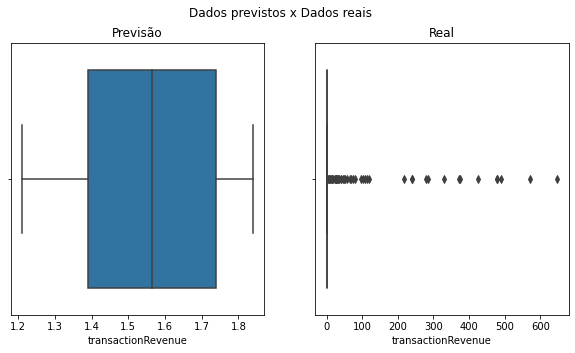

In [38]:
# Avaliação gráfica do modelo
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
%matplotlib inline
filterwarnings('ignore')

fig, ax = plt.subplots(1, 2, sharey=False, sharex = False, figsize = (10,5))
fig.suptitle('Dados previstos x Dados reais')
sns.boxplot(previsao, ax = ax[0])
ax[0].set_title('Previsão')
ax[0].set_xlabel('transactionRevenue')
sns.boxplot(y_test, ax = ax[1])
ax[1].set_title('Real')
ax[1].set_xlabel('transactionRevenue')

<AxesSubplot:xlabel='transactionRevenue', ylabel='Density'>

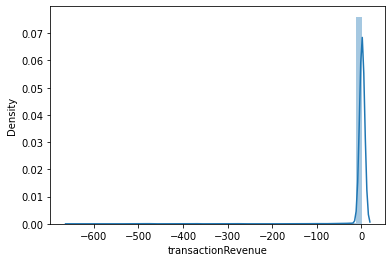

In [39]:
# Gráfico dos erros do modelo
erros = previsao - y_test
fig = sns.distplot(erros)
fig

Nosso modelo está bem ruim. Vamos tentar melhorar nossa feature engineering a fim de melhorar a performance do modelo.

#### Melhorando a feature engineering

Para o primeiro modelo, trabalhamos apenas com as variáveis quantitativas do dataset. Agora, vamos utilizar as variáveis qualitativas também

In [40]:
# Informações da última visita de cada cliente
ultimas_visitas = dados.groupby('fullVisitorId', as_index=False)['visitNumber'].max()
ultimas_visitas

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6
...,...,...
9992,9996691020299725061,3
9993,9996793353803109760,1
9994,9997125062030599880,1
9995,9997464307347866920,1


In [41]:
# Removendo visitas duplicadas de clientes
usuarios_visitas_unicos = dados.drop_duplicates(subset=['fullVisitorId', 'visitNumber'])
usuarios_visitas_unicos.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1.0,0.0,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,0.0,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [42]:
# Obtendo as informações das últimas visitas de cada cliente
visitas = pd.merge(ultimas_visitas, usuarios_visitas_unicos, how='left', on=['fullVisitorId', 'visitNumber'])
visitas

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,0002365800130207040,1,Social,2016-09-04,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,2016-09-28,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,2016-12-05,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,2016-10-02,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,2017-04-20,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,0.0,(not set),(direct),(none),NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,9996691020299725061_1482388264,1482388264,1482388264,Chrome,Macintosh,False,...,NaN,0.0,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN
9993,9996793353803109760,1,Social,2016-11-30,9996793353803109760_1480566609,1480566609,1480566609,Chrome,Android,True,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN
9994,9997125062030599880,1,Organic Search,2017-01-12,9997125062030599880_1484217422,1484217422,1484217422,Safari,iOS,True,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
9995,9997464307347866920,1,Organic Search,2017-03-14,9997464307347866920_1489504370,1489504370,1489504370,Chrome,Android,True,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [43]:
# Obtendo informações das primeiras visitas dos clientes
primeiras_visitas = dados.groupby('fullVisitorId')['visitNumber'].min()
visitas = visitas.join(primeiras_visitas, how = 'left', on = 'fullVisitorId', rsuffix='_primeira')
visitas = pd.merge(visitas, usuarios_visitas_unicos,
                   how = 'left',
                   left_on = ['fullVisitorId','visitNumber_primeira'],
                   right_on = ['fullVisitorId', 'visitNumber'],
                  suffixes=['_ultima', '_primeira'])

In [44]:
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,newVisits_primeira,transactionRevenue_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,2016-09-04,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,2016-09-28,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,2016-12-05,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,2016-10-02,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,2017-04-20,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,0.0,(not set),(direct),(none),NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,9996691020299725061_1482388264,1482388264,1482388264,Chrome,Macintosh,False,...,NaN,0.0,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN
9993,9996793353803109760,1,Social,2016-11-30,9996793353803109760_1480566609,1480566609,1480566609,Chrome,Android,True,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN
9994,9997125062030599880,1,Organic Search,2017-01-12,9997125062030599880_1484217422,1484217422,1484217422,Safari,iOS,True,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
9995,9997464307347866920,1,Organic Search,2017-03-14,9997464307347866920_1489504370,1489504370,1489504370,Chrome,Android,True,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [45]:
# Removendo as variáveis quantitativas que já trabalhamos
for coluna in quant:
    visitas.drop(coluna + '_ultima', axis = 1, inplace = True)
    visitas.drop(coluna + '_primeira', axis = 1, inplace = True)
    
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,2016-09-04,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,2016-09-28,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,2016-12-05,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,2016-10-02,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,2017-04-20,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,9996691020299725061_1482388264,1482388264,1482388264,Chrome,Macintosh,False,...,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN
9993,9996793353803109760,1,Social,2016-11-30,9996793353803109760_1480566609,1480566609,1480566609,Chrome,Android,True,...,(not set),3bb.co.th,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN
9994,9997125062030599880,1,Organic Search,2017-01-12,9997125062030599880_1484217422,1484217422,1484217422,Safari,iOS,True,...,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
9995,9997464307347866920,1,Organic Search,2017-03-14,9997464307347866920_1489504370,1489504370,1489504370,Chrome,Android,True,...,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [46]:
# Removendo colunas de Id
ids = ['sessionId_ultima', 'visitId_ultima', 'sessionId_primeira', 'visitId_primeira']
visitas.drop(columns = ids, inplace = True)
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,2016-09-04,1472974804,Edge,Windows,False,desktop,Europe,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,2016-09-28,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,2016-12-05,1480996024,Chrome,Windows,False,desktop,Asia,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,2016-10-02,1475423502,Opera,Windows,False,desktop,Europe,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,2017-04-20,1492707286,Safari,Macintosh,False,desktop,Americas,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,1482388264,Chrome,Macintosh,False,desktop,Americas,...,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN
9993,9996793353803109760,1,Social,2016-11-30,1480566609,Chrome,Android,True,mobile,Asia,...,(not set),3bb.co.th,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN
9994,9997125062030599880,1,Organic Search,2017-01-12,1484217422,Safari,iOS,True,mobile,Americas,...,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
9995,9997464307347866920,1,Organic Search,2017-03-14,1489504370,Chrome,Android,True,mobile,Europe,...,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [47]:
# Removendo as primeiras informações geográficas
geo = ['continent_primeira', 'subContinent_primeira', 'country_primeira', 'region_primeira', 'city_primeira', 'metro_primeira',
      'networkDomain_primeira']
visitas.drop(columns = geo, inplace = True)
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,2016-09-04,1472974804,Edge,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,2016-09-28,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,2016-12-05,1480996024,Chrome,Windows,False,desktop,Asia,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,2016-10-02,1475423502,Opera,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,2017-04-20,1492707286,Safari,Macintosh,False,desktop,Americas,...,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,1482388264,Chrome,Macintosh,False,desktop,Americas,...,False,desktop,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN
9993,9996793353803109760,1,Social,2016-11-30,1480566609,Chrome,Android,True,mobile,Asia,...,True,mobile,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN
9994,9997125062030599880,1,Organic Search,2017-01-12,1484217422,Safari,iOS,True,mobile,Americas,...,True,mobile,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
9995,9997464307347866920,1,Organic Search,2017-03-14,1489504370,Chrome,Android,True,mobile,Europe,...,True,mobile,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [48]:
# Juntando as variáveis quantitativas e qualitativas
visitas = pd.merge(visitas, dados_quant, on = 'fullVisitorId', how = 'left')
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,2016-09-04,1472974804,Edge,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,2016-09-28,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,2016-12-05,1480996024,Chrome,Windows,False,desktop,Asia,...,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,2016-10-02,1475423502,Opera,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,2017-04-20,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,1482388264,Chrome,Macintosh,False,desktop,Americas,...,NaN,True,/,NaN,NaN,0.0,10,0.0,10,0.0
9993,9996793353803109760,1,Social,2016-11-30,1480566609,Chrome,Android,True,mobile,Asia,...,NaN,NaN,/yt/about/th/,NaN,NaN,1.0,1,1.0,1,0.0
9994,9997125062030599880,1,Organic Search,2017-01-12,1484217422,Safari,iOS,True,mobile,Americas,...,(not provided),NaN,NaN,NaN,NaN,0.0,8,1.0,8,0.0
9995,9997464307347866920,1,Organic Search,2017-03-14,1489504370,Chrome,Android,True,mobile,Europe,...,(not provided),NaN,NaN,NaN,NaN,1.0,1,1.0,1,0.0


#### Criando novas variáveis

In [49]:
# Tempo entre a primeira e a última visita
visitas['tempo_dif'] = visitas['visitStartTime_ultima'] - visitas['visitStartTime_primeira']
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif
0,0002365800130207040,1,Social,2016-09-04,1472974804,Edge,Windows,False,desktop,Europe,...,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,2016-09-28,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0
2,0011056874471185769,1,Social,2016-12-05,1480996024,Chrome,Windows,False,desktop,Asia,...,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0
3,0014443856125569702,1,Social,2016-10-02,1475423502,Opera,Windows,False,desktop,Europe,...,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0
4,0017260116665815114,6,Direct,2017-04-20,1492707286,Safari,Macintosh,False,desktop,Americas,...,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,1482388264,Chrome,Macintosh,False,desktop,Americas,...,True,/,NaN,NaN,0.0,10,0.0,10,0.0,0
9993,9996793353803109760,1,Social,2016-11-30,1480566609,Chrome,Android,True,mobile,Asia,...,NaN,/yt/about/th/,NaN,NaN,1.0,1,1.0,1,0.0,0
9994,9997125062030599880,1,Organic Search,2017-01-12,1484217422,Safari,iOS,True,mobile,Americas,...,NaN,NaN,NaN,NaN,0.0,8,1.0,8,0.0,0
9995,9997464307347866920,1,Organic Search,2017-03-14,1489504370,Chrome,Android,True,mobile,Europe,...,NaN,NaN,NaN,NaN,1.0,1,1.0,1,0.0,0


In [50]:
# Total de visitas por usuário
total_visitas = dados.groupby('fullVisitorId', as_index=False).count().visitNumber
visitas['total_visitas'] = total_visitas
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,total_visitas
0,0002365800130207040,1,Social,2016-09-04,1472974804,Edge,Windows,False,desktop,Europe,...,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,2016-09-28,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,2016-12-05,1480996024,Chrome,Windows,False,desktop,Asia,...,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,2016-10-02,1475423502,Opera,Windows,False,desktop,Europe,...,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,2017-04-20,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,1482388264,Chrome,Macintosh,False,desktop,Americas,...,/,NaN,NaN,0.0,10,0.0,10,0.0,0,1
9993,9996793353803109760,1,Social,2016-11-30,1480566609,Chrome,Android,True,mobile,Asia,...,/yt/about/th/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
9994,9997125062030599880,1,Organic Search,2017-01-12,1484217422,Safari,iOS,True,mobile,Americas,...,NaN,NaN,NaN,0.0,8,1.0,8,0.0,0,1
9995,9997464307347866920,1,Organic Search,2017-03-14,1489504370,Chrome,Android,True,mobile,Europe,...,NaN,NaN,NaN,1.0,1,1.0,1,0.0,0,1


In [51]:
# Criando variáveis de datas

visitas['ano_ultima'] = [data.year for data in visitas['date_ultima']]
visitas['mes_ultima'] = [data.month for data in visitas['date_ultima']]
visitas['dia_ultima'] = [data.day for data in visitas['date_ultima']]

visitas['ano_primeira'] = [data.year for data in visitas['date_primeira']]
visitas['mes_primeira'] = [data.month for data in visitas['date_primeira']]
visitas['dia_primeira'] = [data.day for data in visitas['date_primeira']]

visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,pageviews,transactionRevenue,tempo_dif,total_visitas,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,2016-09-04,1472974804,Edge,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,2016-09-28,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,2016-12-05,1480996024,Chrome,Windows,False,desktop,Asia,...,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,2016-10-02,1475423502,Opera,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,2017-04-20,1492707286,Safari,Macintosh,False,desktop,Americas,...,2,0.0,0,1,2017,4,20,2017,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,2016-12-21,1482388264,Chrome,Macintosh,False,desktop,Americas,...,10,0.0,0,1,2016,12,21,2016,12,21
9993,9996793353803109760,1,Social,2016-11-30,1480566609,Chrome,Android,True,mobile,Asia,...,1,0.0,0,1,2016,11,30,2016,11,30
9994,9997125062030599880,1,Organic Search,2017-01-12,1484217422,Safari,iOS,True,mobile,Americas,...,8,0.0,0,1,2017,1,12,2017,1,12
9995,9997464307347866920,1,Organic Search,2017-03-14,1489504370,Chrome,Android,True,mobile,Europe,...,1,0.0,0,1,2017,3,14,2017,3,14


In [52]:
# Removendo a coluna de id
visitas.drop(columns = 'fullVisitorId', inplace = True)
visitas

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,pageviews,transactionRevenue,tempo_dif,total_visitas,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,2016-09-04,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,...,1,0.0,0,1,2016,9,4,2016,9,4
1,1,Organic Search,2016-09-28,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,...,3,0.0,0,1,2016,9,28,2016,9,28
2,1,Social,2016-12-05,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,...,2,0.0,0,1,2016,12,5,2016,12,5
3,1,Social,2016-10-02,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,...,1,0.0,0,1,2016,10,2,2016,10,2
4,6,Direct,2017-04-20,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,...,2,0.0,0,1,2017,4,20,2017,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,3,Referral,2016-12-21,1482388264,Chrome,Macintosh,False,desktop,Americas,Northern America,...,10,0.0,0,1,2016,12,21,2016,12,21
9993,1,Social,2016-11-30,1480566609,Chrome,Android,True,mobile,Asia,Southeast Asia,...,1,0.0,0,1,2016,11,30,2016,11,30
9994,1,Organic Search,2017-01-12,1484217422,Safari,iOS,True,mobile,Americas,Northern America,...,8,0.0,0,1,2017,1,12,2017,1,12
9995,1,Organic Search,2017-03-14,1489504370,Chrome,Android,True,mobile,Europe,Southern Europe,...,1,0.0,0,1,2017,3,14,2017,3,14


In [53]:
# Separando em variáveis em variável-alvo e variáveis explicativas
y = visitas['transactionRevenue'].copy()
x = visitas.drop('transactionRevenue', axis = 1)

In [54]:
x.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,total_visitas,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,2016-09-04,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,2016-09-28,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,2016-12-05,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,2016-10-02,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,2017-04-20,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,...,0.0,2,0,1,2017,4,20,2017,4,20


In [55]:
# Obtendo as variáveis qualitativas
quali = visitas.dtypes[visitas.dtypes == object].keys()
quali

Index(['channelGrouping_ultima', 'browser_ultima', 'operatingSystem_ultima',
       'deviceCategory_ultima', 'continent_ultima', 'subContinent_ultima',
       'country_ultima', 'region_ultima', 'metro_ultima', 'city_ultima',
       'networkDomain_ultima', 'campaign_ultima', 'source_ultima',
       'medium_ultima', 'keyword_ultima', 'isTrueDirect_ultima',
       'referralPath_ultima', 'adContent_ultima', 'campaignCode_ultima',
       'channelGrouping_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'deviceCategory_primeira',
       'campaign_primeira', 'source_primeira', 'medium_primeira',
       'keyword_primeira', 'isTrueDirect_primeira', 'referralPath_primeira',
       'adContent_primeira', 'campaignCode_primeira'],
      dtype='object')

In [56]:
# Transformando as variáveis qualitativas em número utilizando o LabelEncoder
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

for coluna in quali:
    string = list(x[coluna].values.astype('str'))
    x[coluna] = lbl.fit_transform(string)

x

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,total_visitas,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,2016-09-04,1472974804,7,9,False,0,4,7,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,2016-09-28,1475084026,5,3,False,0,2,11,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,2016-12-05,1480996024,5,9,False,0,3,15,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,2016-10-02,1475423502,15,9,False,0,4,7,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,2017-04-20,1492707286,18,6,False,0,2,11,...,0.0,2,0,1,2017,4,20,2017,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,3,6,2016-12-21,1482388264,5,6,False,0,2,11,...,0.0,10,0,1,2016,12,21,2016,12,21
9993,1,7,2016-11-30,1480566609,5,1,True,1,3,15,...,1.0,1,0,1,2016,11,30,2016,11,30
9994,1,4,2017-01-12,1484217422,18,11,True,1,2,11,...,1.0,8,0,1,2017,1,12,2017,1,12
9995,1,4,2017-03-14,1489504370,5,1,True,1,4,18,...,1.0,1,0,1,2017,3,14,2017,3,14


In [57]:
# Removendo as colunas de datas
x.drop(columns = ['date_ultima', 'date_primeira'], inplace = True)
x

,visitNumber_ultima,channelGrouping_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,...,newVisits,pageviews,tempo_dif,total_visitas,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,1472974804,7,9,False,0,4,7,135,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,1475084026,5,3,False,0,2,11,138,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,1480996024,5,9,False,0,3,15,101,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,1475423502,15,9,False,0,4,7,106,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,1492707286,18,6,False,0,2,11,138,...,0.0,2,0,1,2017,4,20,2017,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,3,6,1482388264,5,6,False,0,2,11,138,...,0.0,10,0,1,2016,12,21,2016,12,21
9993,1,7,1480566609,5,1,True,1,3,15,129,...,1.0,1,0,1,2016,11,30,2016,11,30
9994,1,4,1484217422,18,11,True,1,2,11,138,...,1.0,8,0,1,2017,1,12,2017,1,12
9995,1,4,1489504370,5,1,True,1,4,18,45,...,1.0,1,0,1,2017,3,14,2017,3,14


### Criando os modelos

In [58]:
# Separando os dados em treino e teste
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = SEED)

In [59]:
# Criando uma regressão linear
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

previsao_lm = lm.predict(x_test)

avaliar_modelo(y_test, previsao_lm)

R² = 0.2027
MAE = 5.3562
RMSE = 26.6064


In [61]:
# Erros do modelo
erros_lm = y_test - previsao_lm
erros_lm = np.where(erros_lm < 0, 0, erros_lm)
erros_lm

array([0.        , 2.02648062, 2.72278525, ..., 0.        , 0.        ,
       0.        ])

Text(0.5, 1.0, 'Distribuição dos erros do modelo')

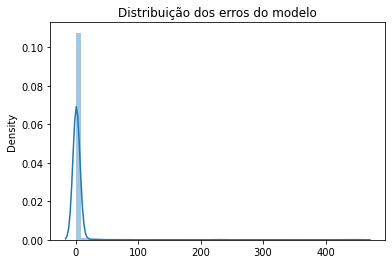

In [70]:
# Analisando os erros
sns.distplot(erros_lm)
plt.title('Distribuição dos erros do modelo')

Text(0, 0.5, 'Valor previsto')

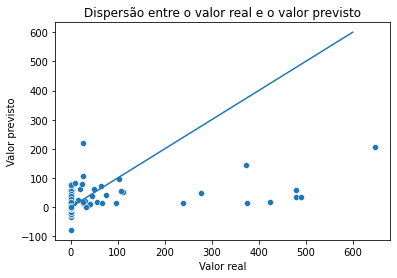

In [72]:
sns.scatterplot(y_test, previsao_lm)
plt.plot(np.linspace(0,600), np.linspace(0,600))
plt.title('Dispersão entre o valor real e o valor previsto')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')

Vemos que a maioria dos erros do modelo estão próximos de zero, porém, à medida que o valor real aumenta, o erro do modelo também aumenta. Isso acontece porque há poucas transações com valores mais altos, o que deixa o modelo mais propenso a prever valores mais baixos.

Em relação ao primeiro modelo criado, este modelo melhorou bastante de performance. Porém, ainda podemos melhorar. Vamos treinar um outro algoritmo de regressão:

In [60]:
# Criando um gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

grb = GradientBoostingRegressor(random_state=SEED)
grb.fit(x_train, y_train)

previsao_grb = grb.predict(x_test)

avaliar_modelo(y_test, previsao_grb)

R² = 0.3159
MAE = 3.0860
RMSE = 24.6450


In [73]:
# Erros do modelo
erros_grb = y_test - previsao_grb
erros_grb = np.where(erros_grb < 0, 0, erros_grb)
erros_grb

array([0.       , 0.       , 0.       , ..., 0.0115714, 0.       ,
       0.       ])

Text(0.5, 1.0, 'Distribuição dos erros do modelo')

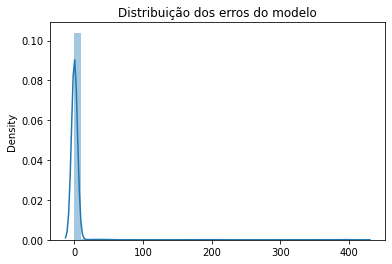

In [74]:
# Analisando os erros
sns.distplot(erros_grb)
plt.title('Distribuição dos erros do modelo')

Text(0, 0.5, 'Valor previsto')

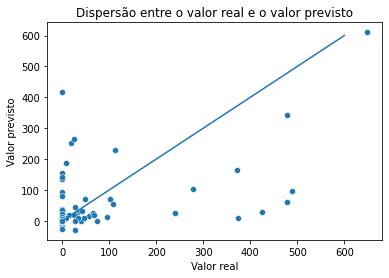

In [75]:
sns.scatterplot(y_test, previsao_grb)
plt.plot(np.linspace(0,600), np.linspace(0,600))
plt.title('Dispersão entre o valor real e o valor previsto')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')

Vimos que o Gradient Boosting performou melhor em todas as métricas comparado com o modelo de regressão linear. Então, esse modelo seria nosso modelo final. Vemos que, para alguns usuários, conseguimos prever quase que o valor exato que ele irá gastar no site, apesar das dificuldades existentes para conseguirmos essa previsão.